#### SVM with different kernel (linear, rbf, polynomial, and sigmoid)

____
__Dataset__
Diabetes

__Column__
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

__Class__
- Outcome: Class variable (0 or 1)
____

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,

In [ ]:
df = pd.read_csv("M:/Kuliah/SEMESTER 5/[3] Data Mining/[18] Praktikum 2/diabetes.csv")
# Definisikan 5 baris awal tabel untuk mengecek label
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print('instance (baris):', df.shape[0])
print('variabel (kolom):', df.shape[1])

df.columns

instance (baris): 768
variabel (kolom): 9


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Exploratory Data Analysis (EDA)**
* Menunjukkan nilai NaN di dataset
* Menghitung jumlah data
* Membuat countplots untuk class 0 vs 1

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
Outcome = df['Outcome'].value_counts(ascending=False)
Outcome

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='Outcome', ylabel='count'>

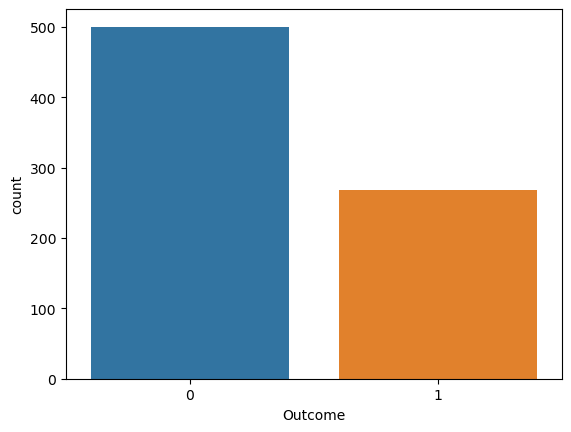

In [ ]:
# Buat visualisasi Countplot for 0 vs. 1 sebagai imbalanced dataset
sns.countplot(x='Outcome',data=df)

Text(0, 0.5, 'Outcome')

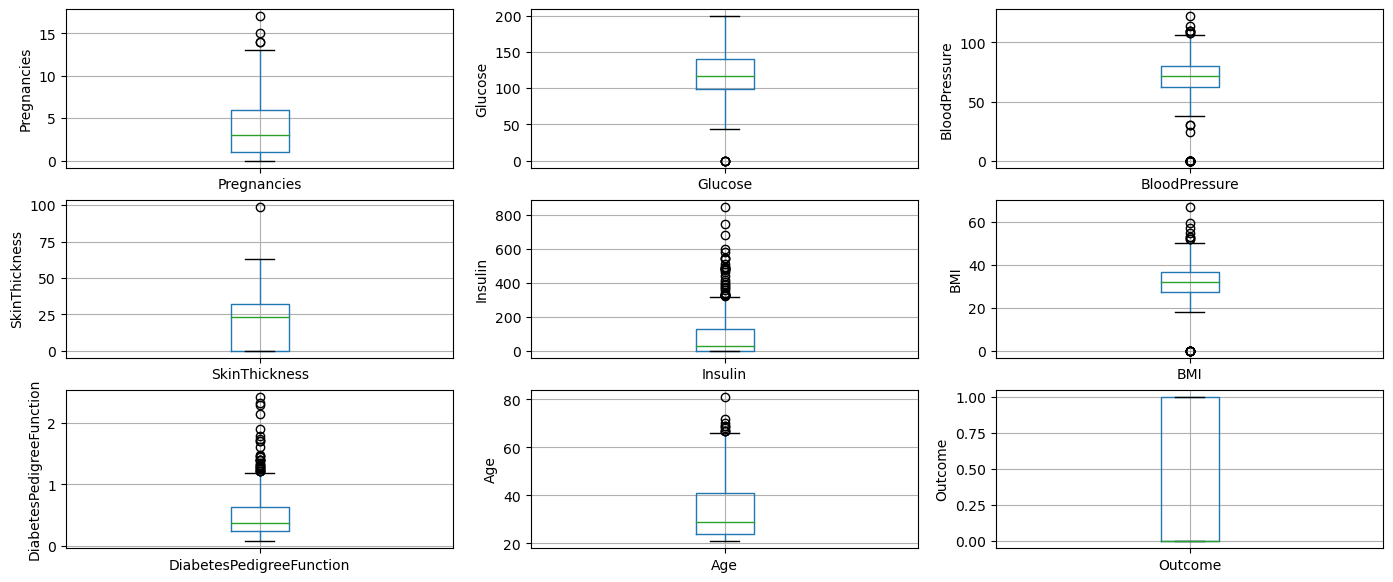

In [ ]:
plt.figure(figsize=(17,7))

plt.subplot(3, 3, 1)
fig = df.boxplot(column='Pregnancies')
fig.set_title('')
fig.set_ylabel('Pregnancies')

plt.subplot(3, 3, 2)
fig = df.boxplot(column='Glucose')
fig.set_title('')
fig.set_ylabel('Glucose')

plt.subplot(3, 3, 3)
fig = df.boxplot(column='BloodPressure')
fig.set_title('')
fig.set_ylabel('BloodPressure')

plt.subplot(3, 3, 4)
fig = df.boxplot(column='SkinThickness')
fig.set_title('')
fig.set_ylabel('SkinThickness')

plt.subplot(3, 3, 5)
fig = df.boxplot(column='Insulin')
fig.set_title('')
fig.set_ylabel('Insulin')

plt.subplot(3, 3, 6)
fig = df.boxplot(column='BMI')
fig.set_title('')
fig.set_ylabel('BMI')

plt.subplot(3, 3, 7)
fig = df.boxplot(column='DiabetesPedigreeFunction')
fig.set_title('')
fig.set_ylabel('DiabetesPedigreeFunction')

plt.subplot(3, 3, 8)
fig = df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(3, 3, 9)
fig = df.boxplot(column='Outcome')
fig.set_title('')
fig.set_ylabel('Outcome')

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

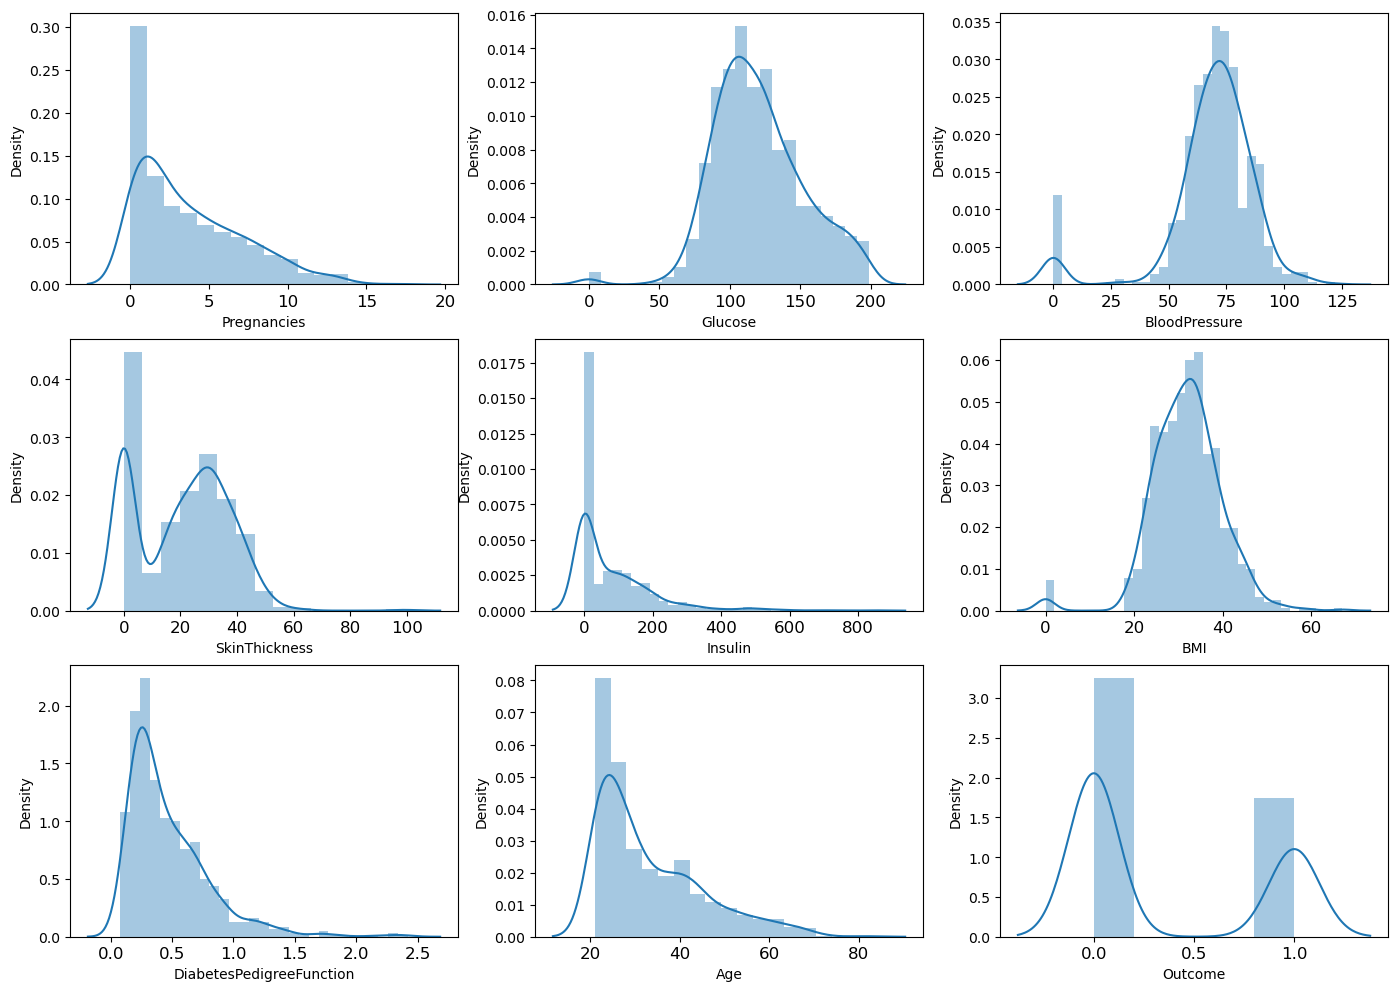

In [ ]:
plt.figure(figsize=(17,12))

plt.subplot(3, 3, 1)
sns.distplot(df['Pregnancies'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 2)
sns.distplot(df['Glucose'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 3)
sns.distplot(df['BloodPressure'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 4)
sns.distplot(df['SkinThickness'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 5)
sns.distplot(df['Insulin'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 6)
sns.distplot(df['BMI'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 7)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 8)
sns.distplot(df['Age'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 9)
sns.distplot(df['Outcome'])
plt.tick_params(axis='x', which='major', labelsize=12)

## **Feature Engineering**
*   Handling imbalanced dataset using Undersampling

In [ ]:
# Handling imbalanced dataset using Undersampling
only_1 = df[df['Outcome']==1]
print('Number of 1 records: {}'.format(only_1.shape[0]))
print('Number of 0 records: {}'.format(df.shape[0]-only_1.shape[0]))

Number of 1 records: 268
Number of 0 records: 500


In [ ]:
only_0 = df[df['Outcome']==0]
only_0 = only_0.loc[0:372,:]
only_0.shape

(230, 9)

In [ ]:
df = pd.concat([df, only_0])
df.shape

(998, 9)

In [ ]:
df = df.drop_duplicates(keep=False)
df.shape

(538, 9)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

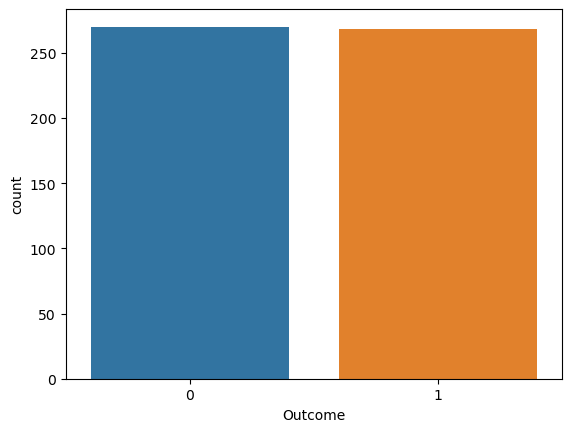

In [ ]:
# Visualisasi Countplot for 0 vs. 1 as balanced dataset
sns.countplot(x='Outcome',data=df)

Text(0, 0.5, 'Outcome')

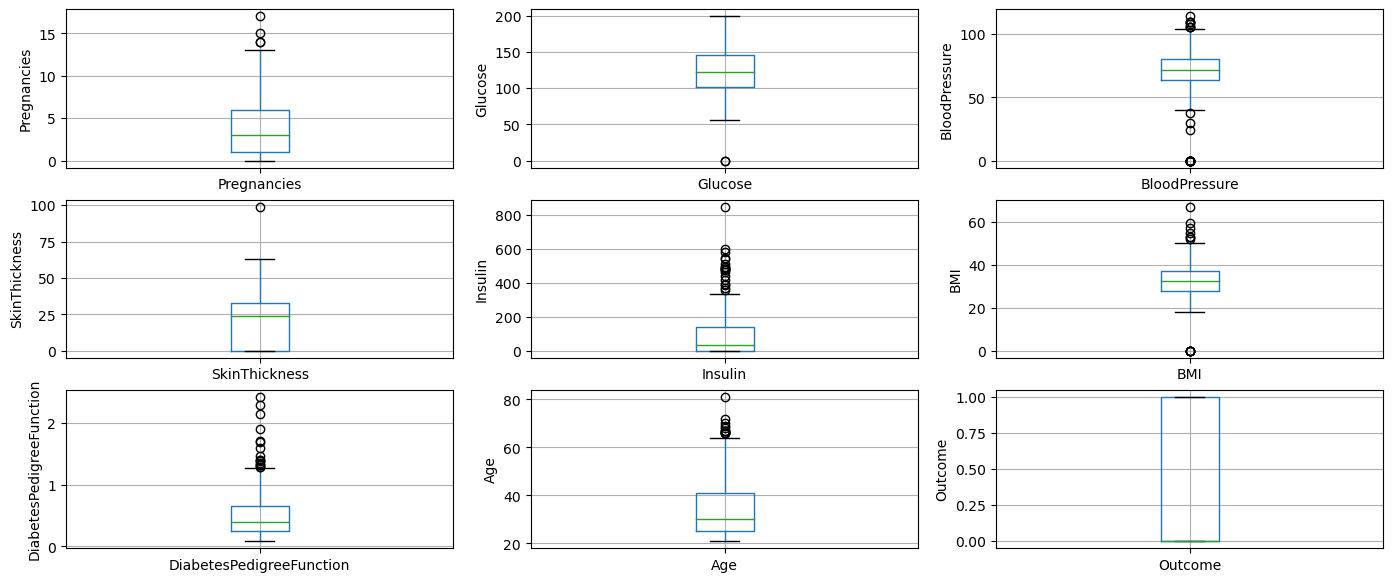

In [ ]:
plt.figure(figsize=(17,7))

plt.subplot(3, 3, 1)
fig = df.boxplot(column='Pregnancies')
fig.set_title('')
fig.set_ylabel('Pregnancies')

plt.subplot(3, 3, 2)
fig = df.boxplot(column='Glucose')
fig.set_title('')
fig.set_ylabel('Glucose')

plt.subplot(3, 3, 3)
fig = df.boxplot(column='BloodPressure')
fig.set_title('')
fig.set_ylabel('BloodPressure')

plt.subplot(3, 3, 4)
fig = df.boxplot(column='SkinThickness')
fig.set_title('')
fig.set_ylabel('SkinThickness')

plt.subplot(3, 3, 5)
fig = df.boxplot(column='Insulin')
fig.set_title('')
fig.set_ylabel('Insulin')

plt.subplot(3, 3, 6)
fig = df.boxplot(column='BMI')
fig.set_title('')
fig.set_ylabel('BMI')

plt.subplot(3, 3, 7)
fig = df.boxplot(column='DiabetesPedigreeFunction')
fig.set_title('')
fig.set_ylabel('DiabetesPedigreeFunction')

plt.subplot(3, 3, 8)
fig = df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(3, 3, 9)
fig = df.boxplot(column='Outcome')
fig.set_title('')
fig.set_ylabel('Outcome')

C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\micha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

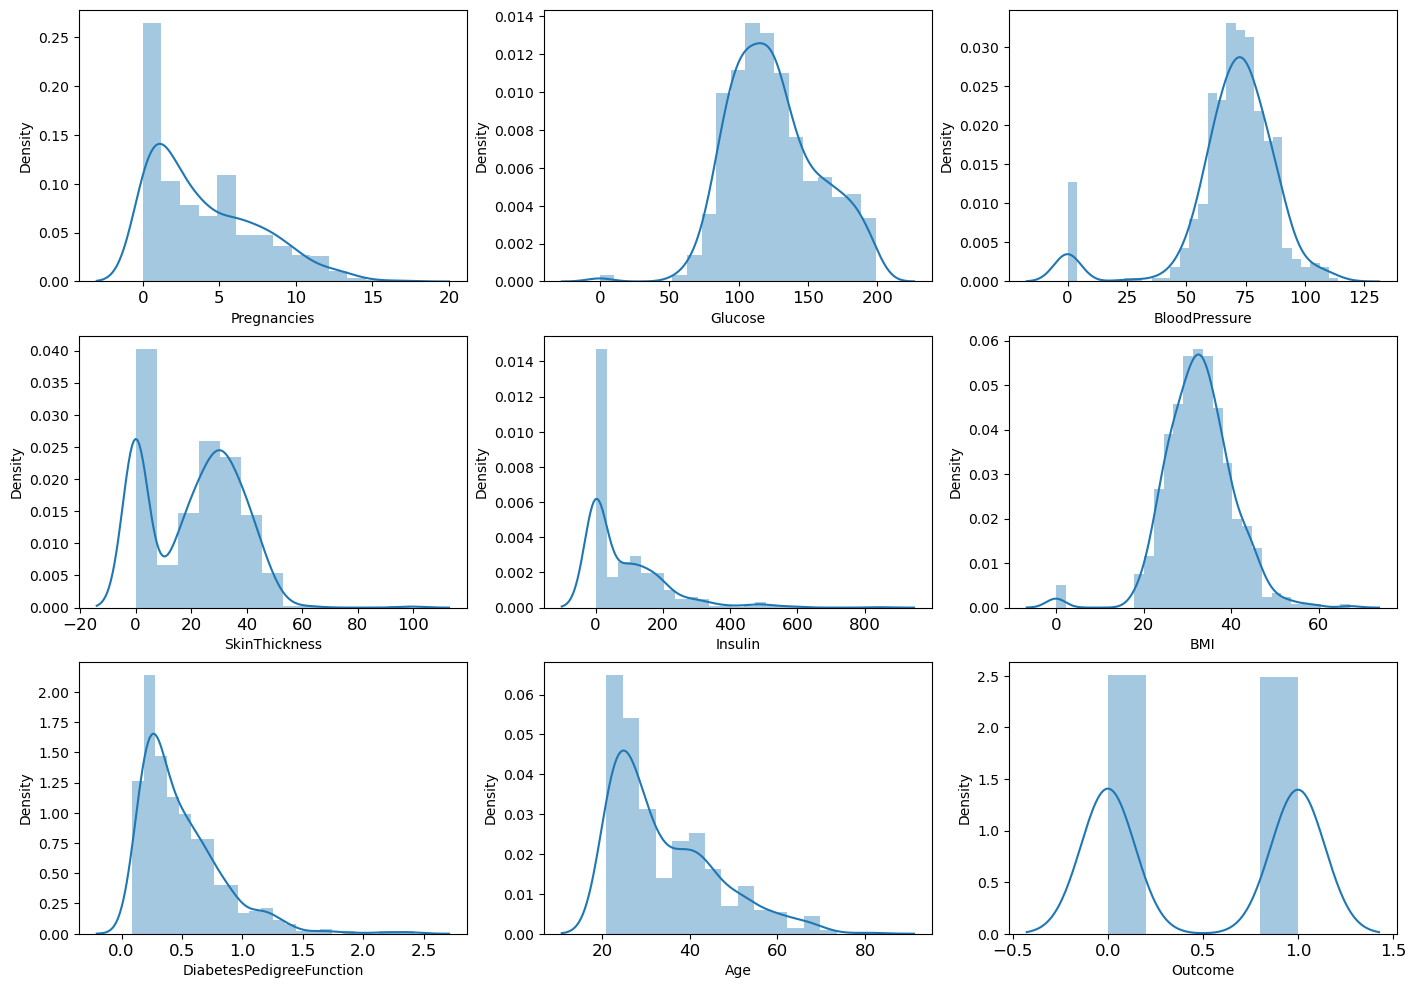

In [ ]:
plt.figure(figsize=(17,12))

plt.subplot(3, 3, 1)
sns.distplot(df['Pregnancies'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 2)
sns.distplot(df['Glucose'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 3)
sns.distplot(df['BloodPressure'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 4)
sns.distplot(df['SkinThickness'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 5)
sns.distplot(df['Insulin'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 6)
sns.distplot(df['BMI'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 7)
sns.distplot(df['DiabetesPedigreeFunction'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 8)
sns.distplot(df['Age'])
plt.tick_params(axis='x', which='major', labelsize=12)

plt.subplot(3, 3, 9)
sns.distplot(df['Outcome'])
plt.tick_params(axis='x', which='major', labelsize=12)

## **Modeling Data dengan SVM**
Menggunakan beberapa kernel, yaitu:
- linear
- rbf
- polynomial
- sigmoid

**Membagi dataset menjadi train dan test menggunakan fungsi dari sklearn menggunakan library sklearn.model_selection lalu mengimport train_test_splitt**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df.iloc[:, 0:7].values
y = df.iloc[:, 8].values

In [ ]:
# Definisikan split data test dan train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2 )

### Kernel: linear

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

print(y_pred)

[1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0]


**Matrix evaluasi dan confusion matriks**

--- Classification SVC report model ---
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        56
           1       0.79      0.79      0.79        52

    accuracy                           0.80       108
   macro avg       0.80      0.80      0.80       108
weighted avg       0.80      0.80      0.80       108



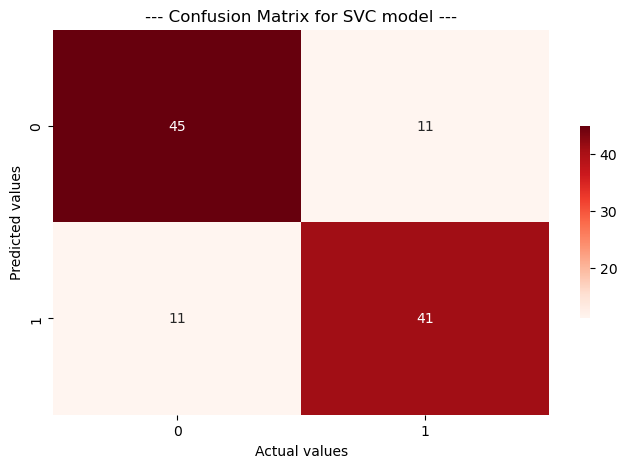

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for SVC model ---')

print('--- Classification SVC report model ---')
print(classification_report(y_test, y_pred))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('kernel linier accuracy:',accuracy)

kernel linier accuracy: 0.7962962962962963


### Kernel: rbf

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1, probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

print(y_pred)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1]


**Matrix evaluasi dan confusion matriks**

--- Classification SVC report model ---
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        56
           1       0.69      0.69      0.69        52

    accuracy                           0.70       108
   macro avg       0.70      0.70      0.70       108
weighted avg       0.70      0.70      0.70       108



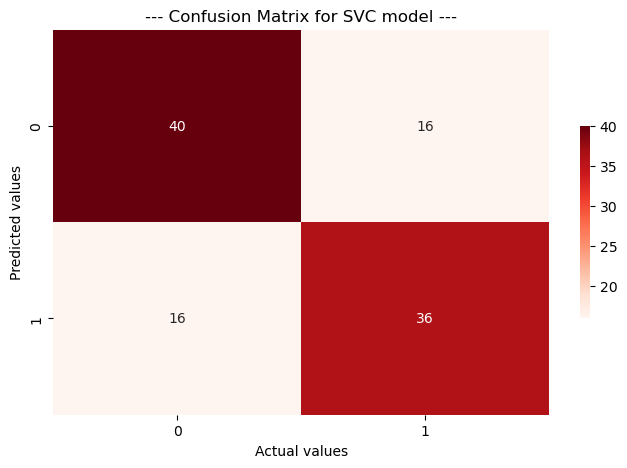

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for SVC model ---')

print('--- Classification SVC report model ---')
print(classification_report(y_test, y_pred))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('kernel linier accuracy:',accuracy)

kernel linier accuracy: 0.7037037037037037


### Kernel: polynomial

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='poly', C=1, probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

print(y_pred)

[1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0
 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0]


**Matrix evaluasi dan confusion matriks**

--- Classification SVC report model ---
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        56
           1       0.84      0.62      0.71        52

    accuracy                           0.76       108
   macro avg       0.78      0.75      0.75       108
weighted avg       0.78      0.76      0.75       108



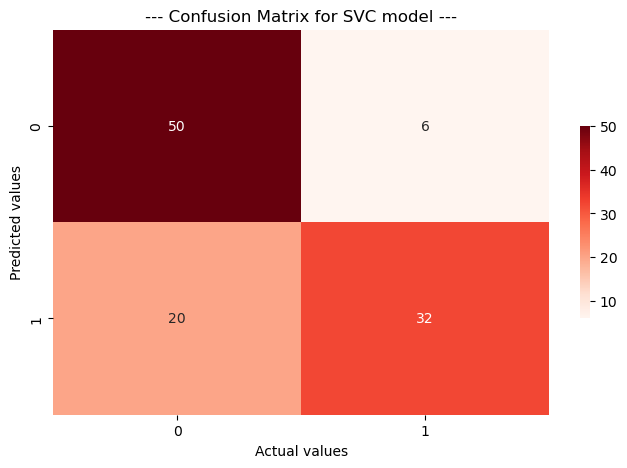

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for SVC model ---')

print('--- Classification SVC report model ---')
print(classification_report(y_test, y_pred))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('kernel linier accuracy:',accuracy)

kernel linier accuracy: 0.7592592592592593


### Kernel: sigmoid

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', C=1, probability=True)
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

print(y_pred)

[1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0]


**Matrix evaluasi dan confusion matriks**

--- Classification SVC report model ---
              precision    recall  f1-score   support

           0       0.42      0.39      0.40        56
           1       0.38      0.40      0.39        52

    accuracy                           0.40       108
   macro avg       0.40      0.40      0.40       108
weighted avg       0.40      0.40      0.40       108



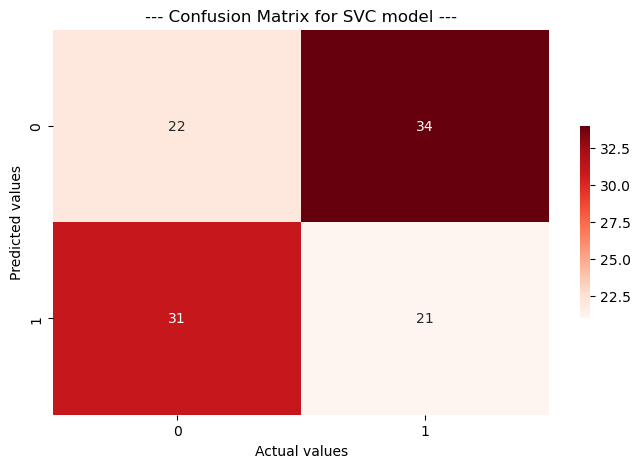

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['0', '1']
g = sns.heatmap(data=cm, annot=True, cmap="Reds", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('--- Confusion Matrix for SVC model ---')

print('--- Classification SVC report model ---')
print(classification_report(y_test, y_pred))

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('kernel linier accuracy:',accuracy)

kernel linier accuracy: 0.39814814814814814
